In [148]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm

## Estimacion Basica (Vainilla)

#### cargar datos

In [149]:
data = pd.read_csv("data/casas-california.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### visualizar casa de california

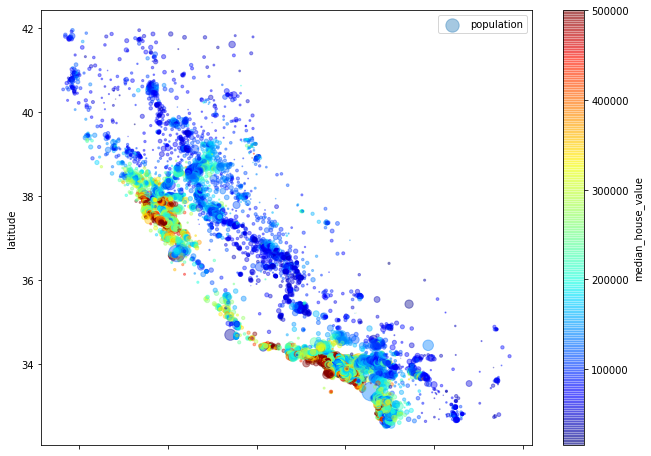

In [150]:
data.plot(kind ="scatter", x ="longitude", y ="latitude", alpha = 0.4,
             s = data["population"] / 100, label ="population", figsize =(11,8),
             c ="median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, ) 
plt.legend()

In [151]:
### EJERCICIO: (1pt)
# Revise los tipos de las columnas y verifique que cada uno esta definido correctamente 
# (ejemplo, la variable OCEAN_PROXIMITY debe ser categorica)
enc = OrdinalEncoder()
enc.fit(data[["ocean_proximity"]])
data[["ocean_proximity"]] = enc.transform(data[["ocean_proximity"]])
data["ocean_proximity"] =  data["ocean_proximity"].astype('category')

In [152]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

# Se intenta normalizar median_house_value
median_house_value = data['median_house_value'].values.reshape(-1,1)
scaler = RobustScaler().fit(median_house_value)
median_house_value = scaler.transform(median_house_value)
data['median_house_value'] = median_house_value

In [153]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
data["cost_per_room"] = data["median_house_value"] / data["total_rooms"]
data["cost_per_bedroom"] = data["median_house_value"] / data["total_bedrooms"]
data["income_per_household"] = data["median_income"] / data["households"]

data["cost_per_latitude"] = data["median_house_value"] / data["latitude"]
data["cost_per_longitude"] = data["median_house_value"] / data["longitude"]

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,cost_per_room,cost_per_bedroom,income_per_household,cost_per_latitude,cost_per_longitude
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,1.880448,3.0,0.146591,0.002137,0.014577,0.066073,0.049642,-0.015385
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,1.232041,3.0,0.155797,0.000174,0.001114,0.007295,0.032542,-0.010081
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,1.187941,3.0,0.129516,0.000810,0.006252,0.041002,0.031386,-0.009718
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,1.113523,3.0,0.184458,0.000874,0.004738,0.025768,0.029419,-0.009109
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,1.119724,3.0,0.172096,0.000688,0.003999,0.014850,0.029583,-0.009159


#### correlaciones

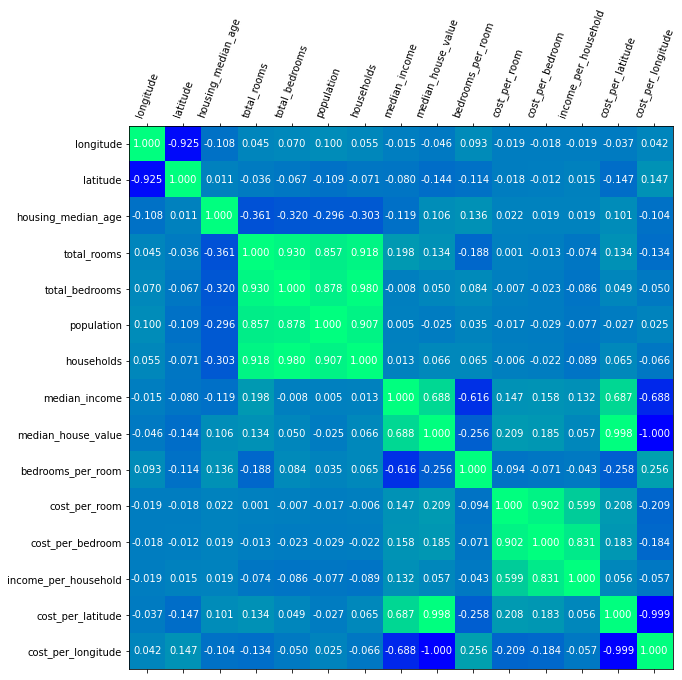

In [154]:
### EJERCICIO: (1pt) 
# utilize matplotlib para desplegar la matriz de correlaciones
size=10
corr = data.corr()
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap='winter')
plt.xticks(range(len(corr.columns)), corr.columns,rotation=70);
plt.yticks(range(len(corr.columns)), corr.columns);
for i in range(len(corr.values)):
    for j in range(len(corr.values)):
        text = ax.text(j, i, '{:0.3f}'.format(corr.values[i, j]),
                       ha="center", va="center", color="w")
plt.show()

In [155]:
### EJERCICIO: (1pt) 
# despliegue las correlaciones de la variable median_house_value

corr["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
cost_per_latitude       0.998449
median_income           0.688075
cost_per_room           0.209406
cost_per_bedroom        0.184768
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
income_per_household    0.057479
total_bedrooms          0.049686
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_per_room      -0.255880
cost_per_longitude     -0.999853
Name: median_house_value, dtype: float64

#### limpieza de datos

<AxesSubplot:>

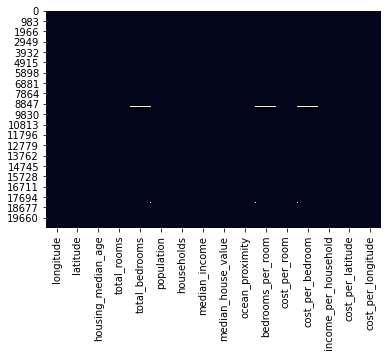

In [156]:
### EJERCICIO: (1pt)
# utilize seaborn para revisar de que no hay valores en blanco. despliegue el grafico de seaborn.
# convertir columnas en datos numericos
for c in data.columns:
    dataTypeObj = data.dtypes[c]
    if dataTypeObj != np.object:
        data[c] = pd.to_numeric(data[c], errors ='coerce')

sns.heatmap(data.isnull(), cbar=False)

<AxesSubplot:>

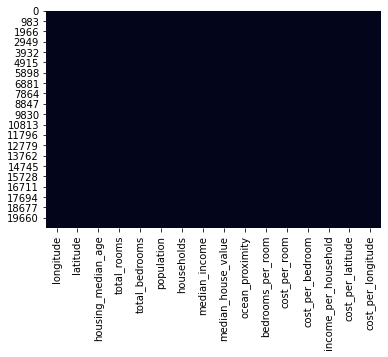

In [157]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())
data['bedrooms_per_room'] = data['bedrooms_per_room'].fillna(data['bedrooms_per_room'].median())
data['cost_per_bedroom'] = data['cost_per_bedroom'].fillna(data['cost_per_bedroom'].median())
# vamos a revisar si los valores nulos
sns.heatmap(data.isnull(), cbar=False)

#### test & training set

In [158]:
### EJERCICIO: (1pt) 
# separe el dataset train:80%, test:20%, random_state=42 
# donde y = median_house_value
# separacion de test de entrenamiento y test de prueba.
X = data.loc[:, data.columns != 'median_house_value']
y = data["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### regresion lineal multiple

In [159]:
### EJERCICIO: (1pt)
# estime el modelo de regresion lineal utilizando Sklearn.
# imprima los coeficientes

#Estimación con datos de train

model = LinearRegression().fit(x_train.values, y_train.values)
print("====Coeficientes====")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

y_prima_train = model.predict(x_train)

# calculamos el MSE con Sklearn!
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_prima_train)
print("==============")
print("MSE TRAIN:",mse_train)

====Coeficientes====
b 0 : 0.27
b 1 : 0.00
b 2 : 0.00
b 3 : 0.00
b 4 : -0.00
b 5 : 0.00
b 6 : 0.00
b 7 : -0.00
b 8 : -0.00
b 9 : 0.00
b 10 : -0.00
b 11 : -0.05
b 12 : -0.01
b 13 : 0.00
b 14 : -14.66
b 15 : -169.45
MSE TRAIN: 2.3946619400396785e-05


In [160]:
#Estimación con datos de test

model = LinearRegression().fit(x_test.values, y_test.values)
print("====Coeficientes====")
print("b",0,":","%.2f"%model.intercept_)
for i,b in zip(np.arange(1,len(model.coef_)+1), model.coef_):
    print("b",i,":", "%.2f"%b)

y_prima_test = model.predict(x_test)

# calculamos el MSE con Sklearn!
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_prima_test)
print("==============")
print("MSE TEST:",mse_test)

====Coeficientes====
b 0 : 0.28
b 1 : 0.00
b 2 : 0.00
b 3 : 0.00
b 4 : -0.00
b 5 : -0.00
b 6 : -0.00
b 7 : 0.00
b 8 : -0.00
b 9 : 0.00
b 10 : -0.00
b 11 : -0.03
b 12 : -0.02
b 13 : -0.00
b 14 : -14.62
b 15 : -169.26
MSE TEST: 2.3332619177749775e-05


In [161]:
### EJERCICIO: (1pt)
# utilize statsmodels para estimar las estadisticas del modelo actual.
# estime el MSE del train/test
X2 = sm.add_constant(X)
model_ols = sm.OLS(y, X2)
pred = model_ols.fit()
print(pred.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.644e+07
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:12:00   Log-Likelihood:                 80555.
No. Observations:               20640   AIC:                        -1.611e+05
Df Residuals:                   20624   BIC:                        -1.610e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2759 

In [162]:
# Valores la primera corrida sin transformaciones y escalamientos

# ====Coeficientes====
# b 0 : -3594630.76
# b 1 : -42807.77
# b 2 : -42565.78
# b 3 : 1184.27
# b 4 : -8.14
# b 5 : 116.39
# b 6 : -38.60
# b 7 : 46.20
# b 8 : 40511.83
# b 9 : -318.83
# ==============

# MSE: 4810958229.787786


#                             OLS Regression Results                            
# ==============================================================================
# Dep. Variable:     median_house_value   R-squared:                       0.636
# Model:                            OLS   Adj. R-squared:                  0.635
# Method:                 Least Squares   F-statistic:                     3998.
# Date:                Sun, 16 Aug 2020   Prob (F-statistic):               0.00
# Time:                        19:21:20   Log-Likelihood:            -2.5945e+05
# No. Observations:               20640   AIC:                         5.189e+05
# Df Residuals:                   20630   BIC:                         5.190e+05
# Df Model:                           9                                         
# Covariance Type:            nonrobust                                         
# ======================================================================================
#                          coef    std err          t      P>|t|      [0.025      0.975]
# --------------------------------------------------------------------------------------
# const              -3.566e+06   6.55e+04    -54.409      0.000   -3.69e+06   -3.44e+06
# longitude          -4.257e+04    743.643    -57.246      0.000    -4.4e+04   -4.11e+04
# latitude           -4.245e+04    688.504    -61.654      0.000   -4.38e+04   -4.11e+04
# housing_median_age  1144.1586     43.266     26.445      0.000    1059.353    1228.964
# total_rooms           -6.6328      0.777     -8.541      0.000      -8.155      -5.111
# total_bedrooms        81.1401      5.997     13.531      0.000      69.386      92.894
# population           -39.8508      1.078    -36.970      0.000     -41.964     -37.738
# households            79.3295      6.748     11.757      0.000      66.104      92.555
# median_income       3.976e+04    333.275    119.296      0.000    3.91e+04    4.04e+04
# ocean_proximity       71.0301    367.540      0.193      0.847    -649.377     791.438
# ==============================================================================
# Omnibus:                     5041.598   Durbin-Watson:                   0.964
# Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18954.308
# Skew:                           1.185   Prob(JB):                         0.00
# Kurtosis:                       7.052   Cond. No.                     5.33e+05
# ==============================================================================


## Estimacion Avanzada - Feature Engineering

En este momento, ud acaba de realizar la estimación del modelo más básico, sin aplicar transformaciones, ni escalamientos a las variables. 

**Aqui es donde se pone bonito...**

En esta sección debe estudiar las variables, sus distribuciones, para identificar qué tipo de cosas se pueden realizar para mejorar el modelo. Vuelva a calcular las estadísticas del modelo (antes y después) para que tenga un punto de referencia.

Algunas recomendaciones:
- Trate de comprender el rol de la variable en la prediccion. Tiene sentido?
- Algunos modelos trabajan mejor con menos variables. (aqui puede agregar o remover variables)
- Aplique transformaciones para "normalizar" variables (que tengan una distribucion quasi-normal)
- considere crear nuevas variables de ser necesario: por ejemplo bedrooms_per_room = data["total_bedrooms"] / data["total_rooms"]

In [163]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

In [164]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 

In [165]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones

In [166]:
### EJERCICIO: (1pt)
# Cree o Elimine variables 

In [167]:
### EJERCICIO: (1pt)
# Estime nuevamente el modelo de regresion lineal

In [168]:
### EJERCICIO: (1pt)
# Aplique Escalamiento y Transformaciones